In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Get Info for each DataFrame
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 6.9+ KB


In [4]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 51.8+ KB


In [5]:
# Print Number of Unique Mice ID's in Data

study_results_unique = len(study_results['Mouse ID'].unique())
mouse_metadata_unique = len(study_results['Mouse ID'].unique())

print(f'Unique Mice in study results df: {study_results_unique}')
print(f'Unique Mice in mouse metadata df: {mouse_metadata_unique}')

Unique Mice in study results df: 249
Unique Mice in mouse metadata df: 249


In [6]:
# ID any MouseID / Timepoint Duplicates save into new DF

study_results_sorted = study_results.sort_values(['Mouse ID','Timepoint'])

id_duplicates = study_results_sorted[study_results_sorted.duplicated(subset=['Mouse ID','Timepoint'])==True]

dups = []
for item in id_duplicates['Mouse ID'].unique():
    dups.append(item)
print(f'Number of duplicate IDs: {len(dups)}')

duplicate_df = study_results[study_results['Mouse ID'] == dups[0]]

# Clean DF with no duplicates

clean_study_results_df = study_results[study_results['Mouse ID'] != dups[0]]

lines_dropped = len(study_results) - len(clean_study_results_df)
study_results_unique = len(clean_study_results_df['Mouse ID'].unique())

print(f'Lines dropped {lines_dropped}')
print(f'Unique Mice after dropping duplicates: {study_results_unique}')

Number of duplicate IDs: 1
Lines dropped 13
Unique Mice after dropping duplicates: 248


In [7]:
# Merge Clean Study Results and Mouse Metadata DF's
main_df = clean_study_results_df.merge(mouse_metadata,on='Mouse ID')

In [8]:
# Create DataFrame grouped by Drug Regimen
drug_df = main_df.groupby('Drug Regimen')

# Save summary metrics
mean = drug_df['Tumor Volume (mm3)'].mean()
median = drug_df['Tumor Volume (mm3)'].median()
var = drug_df['Tumor Volume (mm3)'].var()
std = drug_df['Tumor Volume (mm3)'].std()
sem = drug_df['Tumor Volume (mm3)'].sem()

# created dictionary for summary DataFrame
sum_dict = {'Mean':mean,'Median':median,'Variance':var,'Standard Deviation':std,'SEM':sem}

# Create, Save, and Display Summary DataFrame
summary_df = pd.DataFrame(sum_dict)
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


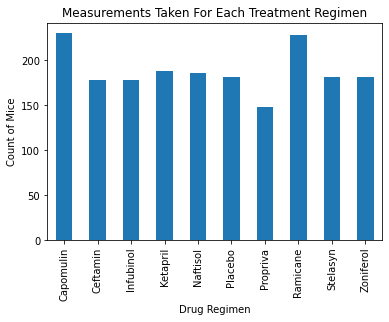

In [23]:
# DF.plot()

plt.ylabel('Count of Mice')
drug_df.count()['Mouse ID'].plot(kind='bar',title='Measurements Taken For Each Treatment Regimen',width=.5);

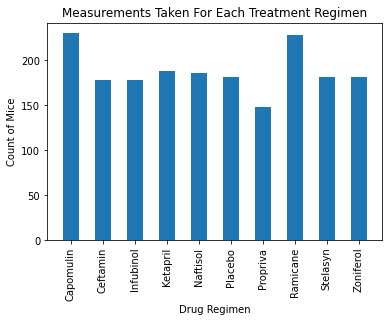

In [22]:
# pyplot

drug_count = drug_df.count()
drugs = drug_count.index
count = drug_count['Mouse ID']
plt.ylabel('Count of Mice')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.title('Measurements Taken For Each Treatment Regimen')
plt.bar(drugs,count,width=.5);

In [24]:
# Pie Chart, Build DF
mouse_metadata_clean = mouse_metadata[mouse_metadata['Mouse ID'] != dups[0]]
mouse_metadata_bysex = mouse_metadata_clean.groupby('Sex').count()

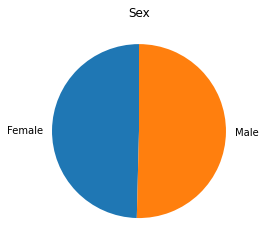

In [25]:
# DF.plot()
mouse_metadata_bysex['Mouse ID'].plot.pie(startangle=90,title="Sex").set_ylabel('');

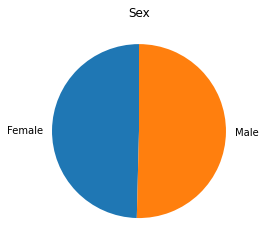

In [26]:
# pyplot

mouse_metadata_bysex
sex = mouse_metadata_bysex.index
count = mouse_metadata_bysex['Mouse ID']
plt.pie(mouse_metadata_bysex['Mouse ID'],startangle=90,labels=sex)
plt.title('Sex');

In [85]:
outliers_dict['Ceftamin']

[46.78453491,
 67.74866174,
 64.72983655,
 68.59474498,
 45.0,
 67.52748237,
 47.784681799999994,
 45.0,
 68.92318457,
 64.63494887,
 45.0,
 45.0]

In [83]:
# Hide Slice Copy Warning
pd.options.mode.chained_assignment = None

# Create DF with only the top 4 treatments
top = ['Capomulin','Ceftamin','Infubinol','Ramicane']
top_treatments_df = main_df[(main_df['Drug Regimen'] == top[0])|(main_df['Drug Regimen'] == top[1])|
                           (main_df['Drug Regimen'] == top[2])|(main_df['Drug Regimen'] == top[3])]

# find max Timepoint for each mouse
latest_timepoints = top_treatments_df.groupby('Mouse ID').max()['Timepoint']

# create column of what each mouse's latest timepoint was and only keep rows where the current timpoint matches
top_treatments_df['Final'] = top_treatments_df['Mouse ID'].apply(lambda x: latest_timepoints[x])
df_final = top_treatments_df[top_treatments_df['Timepoint']==top_treatments_df['Final']]

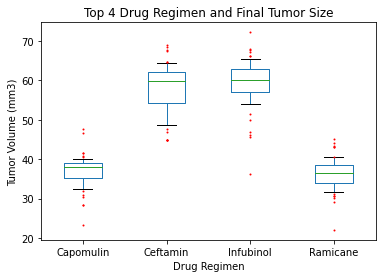

In [102]:
# Build Quartile DF and then Transpose DF
qt = df_final.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()[['25%','50%','75%']]
qt = qt.T

# Build Outlers Dictionary
outliers_dict = {'Capomulin':[],'Ceftamin':[],'Infubinol':[],'Ramicane':[]}

# Go through top 4 drugs and grab rows when the drug matches and when the tumor volume is < .25 or > .75
for drug in top:
    temp = df_final[(df_final['Drug Regimen'] == drug) & 
                    ((df_final['Tumor Volume (mm3)'] < qt[drug][:1][0]) | (df_final['Tumor Volume (mm3)'] > qt[drug][-1:][0]))]
    outliers_dict[drug] = list(temp['Tumor Volume (mm3)'])

# Build Outliers DF
outliers_df = pd.DataFrame(outliers_dict)

# Build Box Plot and Plot Outliers
qt.plot(kind='box')

for num in range(4):
    drug = top[num]
    for item in outliers_df[drug]:
        plt.plot(num+1,item,'bo',markersize=1,c='r')

plt.title('Top 4 Drug Regimen and Final Tumor Size')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)');

In [96]:
# Demonstrate Other way to grab Quartile's with quantile([.25,.5,.75])
qt2 = df_final.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile([.25,.5,.75])

In [97]:
# Find Mice ID's from Capomulin Drug Regimen
df_final[df_final['Drug Regimen']=='Capomulin']['Mouse ID'].values

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

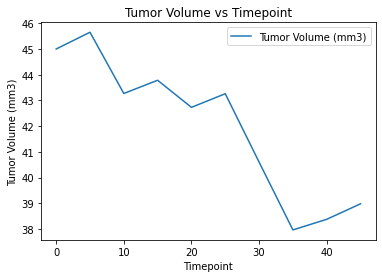

In [104]:
# Line Plot of Tumor Volume vs Timepoint
main_df[main_df['Mouse ID']=='b128'].plot(x='Timepoint',y='Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Timepoint');

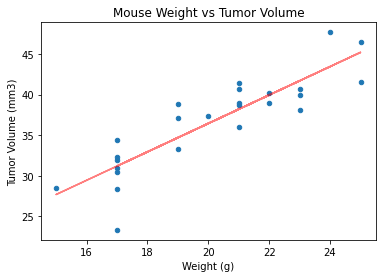

In [118]:
# Perform a linear regression on Weight vs Tumor Volume
tum_vol = df_final[df_final['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
weight = df_final[df_final['Drug Regimen']=='Capomulin']['Weight (g)']

slope, yint, _r, _p, std_err = st.linregress(weight, tum_vol)
fit = slope * weight + yint

# Plot Scatter Plot with Linear Regression
df_final[df_final['Drug Regimen']=='Capomulin'].plot(kind='scatter',x='Weight (g)',y='Tumor Volume (mm3)')
plt.plot(weight,fit,'-',c='r',alpha=.5)
plt.title('Mouse Weight vs Tumor Volume');